# Using Deep Neural Network for our mnist fashion data



In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth= 200)


In [8]:
mnist = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0
# We flatten: the first layer should always be the same as the shape of your data
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_images,training_labels, epochs = 10)
test_loss =model.evaluate(test_images,test_labels)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6245 - accuracy: 0.7851
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2459 - accuracy: 0.9074
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3277 

In [22]:
classification = model.predict(test_images)

In [10]:
classification[0]

array([7.67907011e-07, 5.48982104e-09, 4.20195656e-09, 1.24950972e-09,
       9.46585588e-10, 2.09892094e-02, 1.14074005e-07, 3.27694416e-03,
       5.09841236e-08, 9.75732923e-01], dtype=float32)

In [23]:
print(test_labels[0])

9


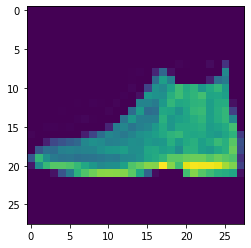

In [18]:
plt.imshow(test_images[0])

# we will use Convnet to improve our accuracy and loss

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.


The parameters of a convnet are very small compare to a fully connected layer, the reasons are :
(i) Parameter sharing: A feature detector (such as vertical edge detector) that is useful in one part of the image is probably useful in another part of the image

(ii) Spasity of connections: In each layer each output value depends on a small number of inputs( each value(features) of the output depends on only specific features of the input computed by the filter). So this makes it less prone to overfitting with smaller training sets

(iii) capturing translation invariance :A picture of a cat shifted a couple of pixels to the right, is still pretty clearly a cat. This helps to encode the fact that,an image shifted a few pixels should result in pretty similar features and should probably be assigned the same label

In [28]:
# the common pattern of a conv is CONV -- POOL -- CONV --- FC -- FC -- SOFTMAX

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#That's because the first convolution expects a single tensor containing everything, 
#so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1.
#Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. 
#Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 
#We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.
training_images = training_images.reshape(60000, 28,28,1) 
training_images = training_images / 255.0
test_images =   test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0
model = keras.Sequential([keras.layers.Conv2D(64, (3,3),activation='relu',input_shape =(28,28,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax') ])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs= 10)

loss = model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.6008 - accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3011 - accuracy: 0.8896
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2518 - accuracy: 0.9049
Epoch 4/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2136 - accuracy: 0.9199
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1860 - accuracy: 0.9310
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1631 - accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1401 - accuracy: 0.9471
Epoch 8/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1203 - accuracy: 0.9549
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1055 - accuracy: 0.9606
Epoch 10/10
313/313 [==============================] - 4s 13ms/s

In [29]:
model.summary()  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               